In [43]:
# Imports needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import CategoricalNB, MultinomialNB
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

from sklearn import svm

Pre-processing

In [44]:
diabetes_df = pd.read_csv('dataset/diabetes_012_health_indicators_BRFSS2015.csv')
diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [45]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [46]:
# Based on the dataset we know 0 just indicates No for a question not missing data so lets check for that
nulls = diabetes_df.isna().any()
print(nulls)

Diabetes_012            False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool


Thats one clean dataset, so lets look at the data, and get more info about the dataset

In [47]:
diabetes_df.shape

(253680, 22)

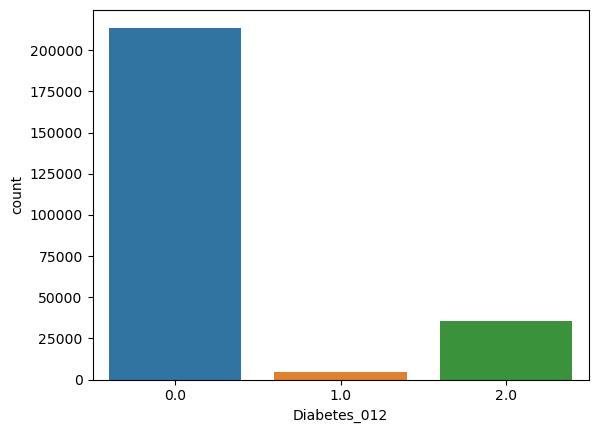

In [48]:
sns.countplot(x='Diabetes_012', data=diabetes_df)
plt.savefig('original-dist.png')

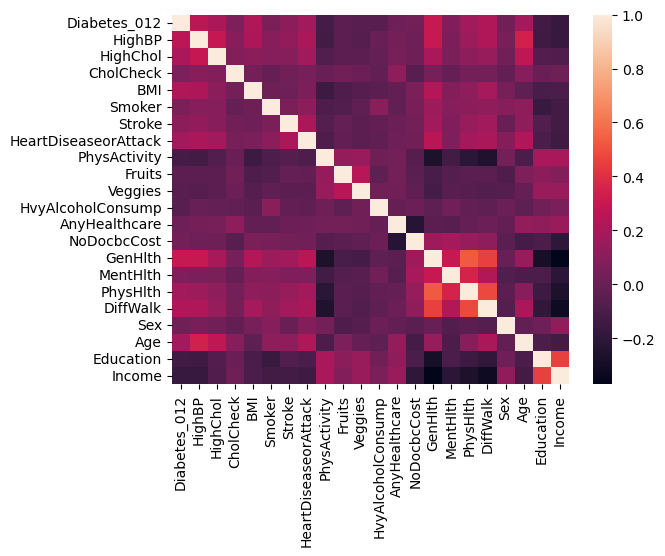

In [49]:
sns.heatmap(diabetes_df.corr(), annot=False )
plt.savefig('heatmap.png')

In [50]:
corr = diabetes_df.corr()
print(corr['Diabetes_012'].drop('Diabetes_012').sort_values())

Income                 -0.171483
Education              -0.130517
PhysActivity           -0.121947
Veggies                -0.058972
HvyAlcoholConsump      -0.057882
Fruits                 -0.042192
AnyHealthcare           0.015410
Sex                     0.031040
NoDocbcCost             0.035436
Smoker                  0.062914
CholCheck               0.067546
MentHlth                0.073507
Stroke                  0.107179
PhysHlth                0.176287
HeartDiseaseorAttack    0.180272
Age                     0.185026
HighChol                0.209085
DiffWalk                0.224239
BMI                     0.224379
HighBP                  0.271596
GenHlth                 0.302587
Name: Diabetes_012, dtype: float64


In [51]:
X = diabetes_df.copy().drop(columns='Diabetes_012')
y = diabetes_df['Diabetes_012']

# split data
X_train, X_vld, y_train, y_vld = train_test_split(X,y, train_size=.2, random_state=42)




In [52]:
# since I might be doing a lot of differnet models lets make a scoreing method
def score(y_vld, y_hat, label=[0,1], average=None):
    print('Accuracy', accuracy_score(y_vld, y_hat))
    print('F1 ', f1_score(y_vld, y_hat, average=average))
    confusion = confusion_matrix(y_vld, y_hat)
    sns.heatmap(confusion, annot=True, cmap='Reds', xticklabels=label, yticklabels=label)

Accuracy 0.8017630479344056
F1  [8.83986016e-01 5.27426160e-04 4.36845633e-01]


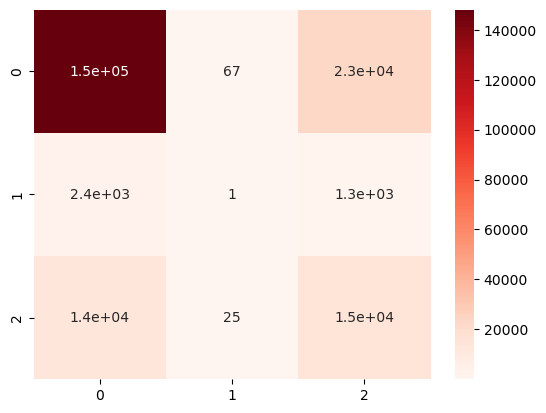

In [53]:
# make these a method so I can just recall them
def categorical(label):
    categorical_clf = CategoricalNB()
    categorical_clf.fit(X_train, y_train)

    y_hat = categorical_clf.predict(X_vld)

    score(y_vld, y_hat, label)
categorical([0,1,2])

Accuracy 0.754508632923368
F1  [0.85648028 0.0285201  0.30334174]


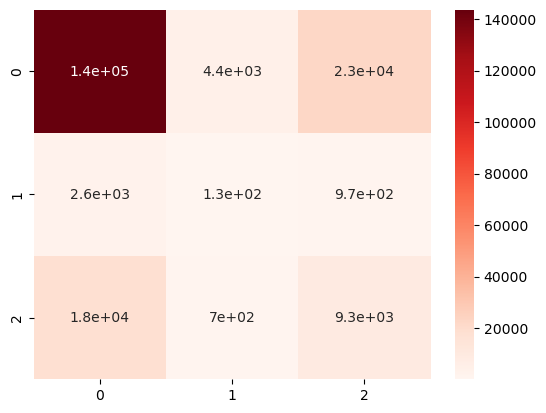

In [54]:
def multinomial(label):
    multinomial_clf = MultinomialNB()
    multinomial_clf.fit(X_train, y_train)

    y_hat = multinomial_clf.predict(X_vld)

    score(y_vld, y_hat, label)

multinomial([0,1,2])

In [55]:
diabetes_df = pd.read_csv('dataset/diabetes_binary_health_indicators_BRFSS2015.csv')
X = diabetes_df.copy().drop(columns='Diabetes_binary')
y = diabetes_df['Diabetes_binary']

# split data
X_train, X_vld, y_train, y_vld = train_test_split(X,y, train_size=.2, random_state=42)

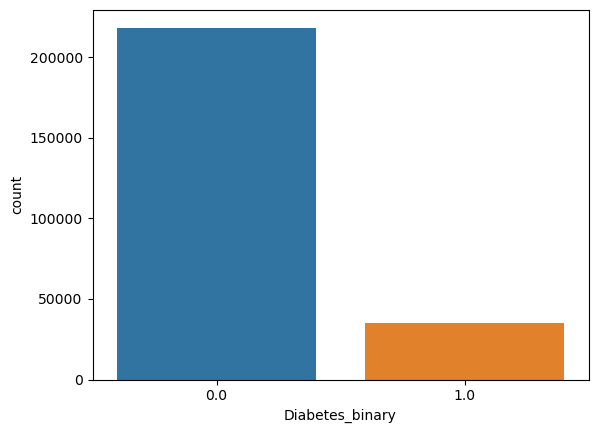

In [56]:
sns.countplot(x='Diabetes_binary', data=diabetes_df)
plt.savefig('combined-dist.png')

Accuracy 0.815934444970041
F1  [0.89004406 0.43539245]


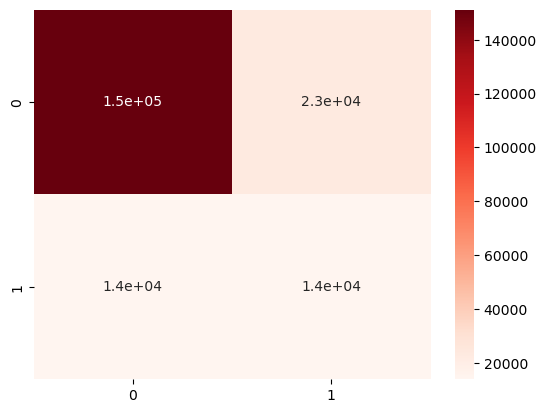

In [57]:
# lets retry the two Nayve Bayes classifers.
categorical([0,1])

Accuracy 0.7769384657836644
F1  [0.86719064 0.30388584]


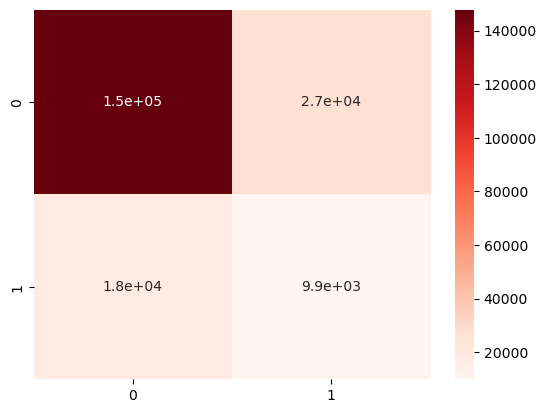

In [58]:
multinomial([0,1])

Lets try an SVM

In [59]:
diabetes_df = pd.read_csv('dataset/diabetes_binary_health_indicators_BRFSS2015.csv')
X = diabetes_df.copy().drop(columns='Diabetes_binary')
y = diabetes_df['Diabetes_binary']

# split data
X_train, X_vld, y_train, y_vld = train_test_split(X,y, train_size=.2, random_state=42)


Accuracy 0.860764545884579
F1  0.011681997831485432


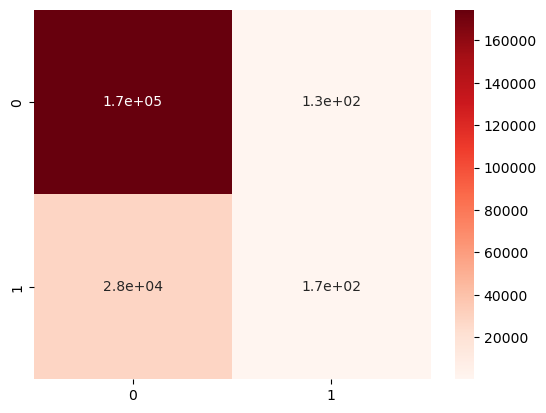

In [60]:
svm_clf = svm.SVC() 
svm_clf.fit(X_train, y_train)

y_hat = svm_clf.predict(X_vld)

score(y_vld, y_hat, average='binary')